# Adult Census Income Classification using Meta Learning

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

from numpy import mean, std

In [2]:
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
import matplotlib.patches as patches
from aif360.algorithms.preprocessing import Reweighing
#from packages import *
#from ml_fairness import *
import matplotlib.pyplot as plt
import seaborn as sns



from IPython.display import Markdown, display

In [3]:
#reading the dataset and converting it to dataframe
df = pd.read_csv("../../Data/adult.csv")

In [4]:
#Viewing the top 5 rows of our dataset
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Exploratory Data Analysis

**Income - Target column**

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='income', ylabel='count'>

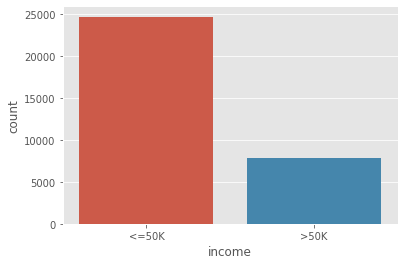

In [5]:
sns.countplot(df.income)

*As we can see, there is a **class imbalance**. The ">50K" class is comparatively very less. So, we will do **Random Over-Sampling** during preprocessing.*


**Age**

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='age', ylabel='Density'>

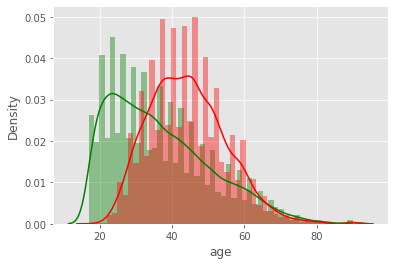

In [6]:
sns.distplot(df[df.income=='<=50K'].age, color='g')
sns.distplot(df[df.income=='>50K'].age, color='r')

*We can observe a rough margin **around 30**. We will divide age into 2 parts ie. under 30 and over 30. We need to check if its useful for our model during testing.*

**Workclass**

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='workclass', ylabel='count'>

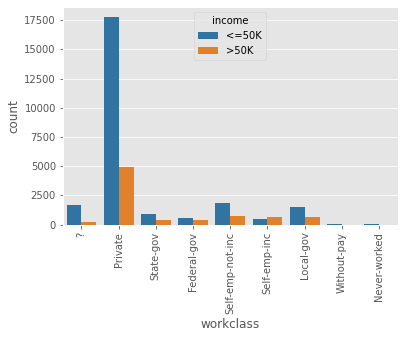

In [7]:
plt.xticks(rotation=90)
sns.countplot(df.workclass, hue=df.income, palette='tab10')

*Majority of the data falls under **Private**. So, we will convert this into Private and not-Private.*

**fnlwgt**

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='fnlwgt', ylabel='Density'>

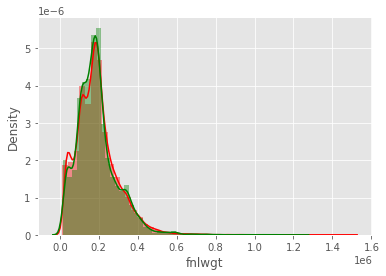

In [8]:
sns.distplot(df[df.income=='<=50K'].fnlwgt, color='r')
sns.distplot(df[df.income=='>50K'].fnlwgt, color='g')

*This is a very **ambiguous** attribute. Will check during testing.*

**Education**

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='education', ylabel='count'>

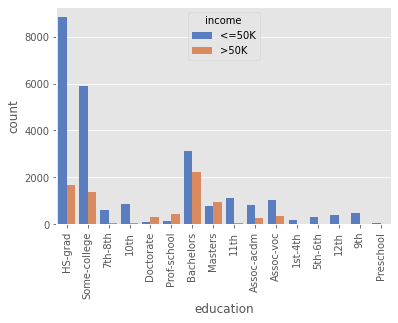

In [9]:
plt.xticks(rotation=90)
sns.countplot(df.education, hue=df.income, palette='muted')

**education.num**

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='education.num', ylabel='count'>

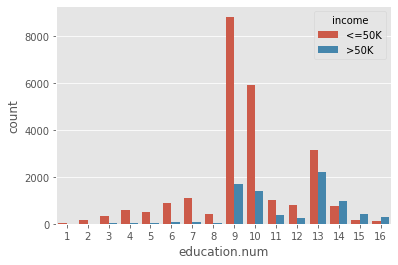

In [10]:
sns.countplot(df["education.num"], hue=df.income)

**marital.status**

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='marital.status', ylabel='count'>

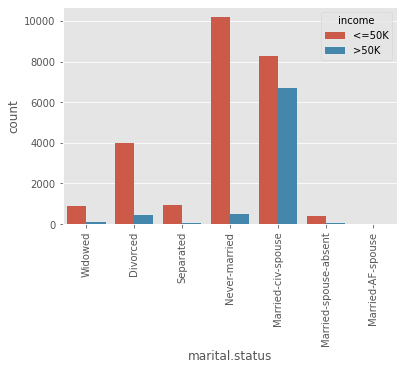

In [11]:
plt.xticks(rotation=90)
sns.countplot(df['marital.status'], hue=df.income)

*We observe that the majority of ">50K" class is **Married-civ-spouse**. So we ll make it 1 and others 0*

**occupation**

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='occupation', ylabel='count'>

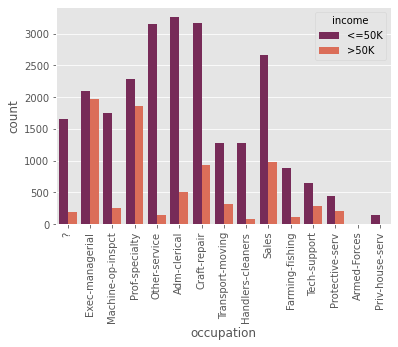

In [12]:
plt.xticks(rotation=90)
sns.countplot(df.occupation, hue=df.income, palette='rocket')

**relationship**

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='relationship', ylabel='count'>

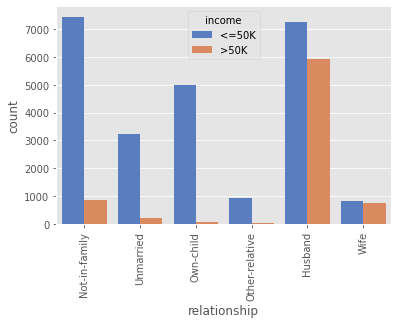

In [13]:
plt.xticks(rotation=90)
sns.countplot(df.relationship, hue=df.income, palette='muted')

**race**

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='race', ylabel='count'>

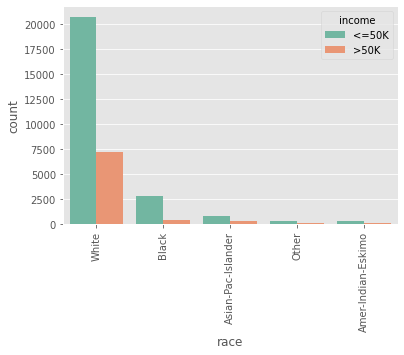

In [14]:
plt.xticks(rotation=90)
sns.countplot(df.race, hue=df.income, palette='Set2')

**sex**

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='sex', ylabel='count'>

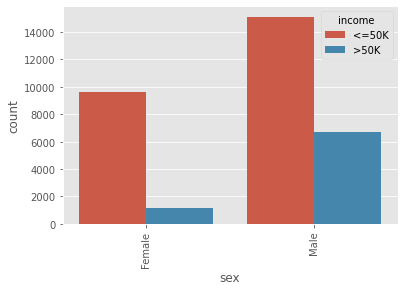

In [15]:
plt.xticks(rotation=90)
sns.countplot(df.sex, hue=df.income)

**capital.gain**

In [16]:
df['capital.gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capital.gain, Length: 119, dtype: int64

**capital.loss**

In [17]:
df['capital.loss'].value_counts()

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: capital.loss, Length: 92, dtype: int64

**hours.per.week**

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='hours.per.week', ylabel='Density'>

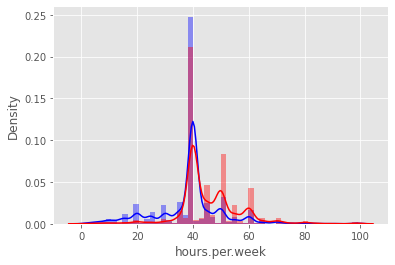

In [18]:
sns.distplot(df[df.income=='<=50K']['hours.per.week'], color='b')
sns.distplot(df[df.income=='>50K']['hours.per.week'], color='r')

**native.country**

In [19]:
df['native.country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

## Preprocessing

### Finding and Handling Missing Data

*Observing the dataset, I found that the null values are marked as "?", So, we will now convert them to numpy.nan(null values).*

In [20]:
df[df.select_dtypes("object") =="?"] = np.nan
nans = df.isnull().sum()
if len(nans[nans>0]):
    print("Missing values detected.\n")
    print(nans[nans>0])
else:
    print("No missing values. You are good to go.")

Missing values detected.

workclass         1836
occupation        1843
native.country     583
dtype: int64


In [21]:
#majority of the values are "Private". Lets fill the missing values as "Private".
df.workclass.fillna("Private", inplace=True)

df.occupation.fillna(method='bfill', inplace=True)

#majority of the values are "United-States". Lets fill the missing values as "United-States".
df['native.country'].fillna("United-States", inplace=True)

print("Handled missing values successfully.")

Handled missing values successfully.


In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import column_or_1d

class MyLabelEncoder(LabelEncoder):

    def fit(self, y, arr=[]):
        y = column_or_1d(y, warn=True)
        if arr == []:
            arr=y
        self.classes_ = pd.Series(arr).unique()
        return self

le = MyLabelEncoder()

### Feature Engineering and Encoding the columns

In [23]:
# age_enc = pd.cut(df.age, bins=(0,25,45,65,100), labels=(0,1,2,3))
df['age_enc'] = df.age.apply(lambda x: 1 if x > 30 else 0)

def prep_workclass(x):
    if x == 'Never-worked' or x == 'Without-pay':
        return 0
    elif x == 'Private':
        return 1
    elif x == 'State-gov' or x == 'Local-gov' or x == 'Federal-gov':
        return 2
    elif x == 'Self-emp-not-inc':
        return 3
    else:
        return 4

df['workclass_enc'] = df.workclass.apply(prep_workclass)

df['fnlwgt_enc'] = df.fnlwgt.apply(lambda x: 0 if x>200000 else 1)

le.fit(df.education, arr=['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th', 
                                             'HS-grad', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Some-college', 'Bachelors', 'Masters', 'Doctorate'])
df['education_enc'] = le.transform(df.education)


df['education.num_enc'] = df['education.num'].apply(lambda x: 1 if x>=9 else 0)

df['marital.status_enc'] = df['marital.status'].apply(lambda x: 1 if x=='Married-civ-spouse' or x == 'Married-AF-spouse' else 0)

def prep_occupation(x):
    if x in ['Prof-specialty', 'Exec-managerial', 'Tech-support', 'Protective-serv']:
        return 2
    elif x in ['Sales', 'Craft-repair']:
        return 1
    else:
        return 0

df['occupation_enc'] = df.occupation.apply(prep_occupation)

df['relationship_enc'] = df.relationship.apply(lambda x: 1 if x in ['Husband', 'Wife'] else 0)

df['race_enc'] = df.race.apply(lambda x: 1 if x=='White' else 0)

df['sex_enc'] = df.sex.apply(lambda x: 1 if x=='Male' else 0)

df['capital.gain_enc'] = pd.cut(df["capital.gain"], 
                                bins=[-1,0,df[df["capital.gain"]>0]["capital.gain"].median(), df["capital.gain"].max()], labels=(0,1,2)).astype('int64')

df['capital.loss_enc'] = pd.cut(df["capital.loss"], 
                                bins=[-1,0,df[df["capital.loss"]>0]["capital.loss"].median(), df["capital.loss"].max()], labels=(0,1,2)).astype('int64')

# hpw_enc = pd.cut(df['hours.per.week'], bins= (0,30,40,53,168), labels=(0,1,2,3))
df['hours.per.week_enc'] = pd.qcut(df['hours.per.week'], q=5, labels=(0,1,2,3), duplicates='drop').astype('int64')

df['native.country_enc'] = df['native.country'].apply(lambda x: 1 if x=='United-States' else 0)

df['income_enc'] = df.income.apply(lambda x: 1 if x==">50K" else 0)

print("Encoding complete.")

Encoding complete.


In [24]:
df.select_dtypes("object").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       32561 non-null  object
 1   education       32561 non-null  object
 2   marital.status  32561 non-null  object
 3   occupation      32561 non-null  object
 4   relationship    32561 non-null  object
 5   race            32561 non-null  object
 6   sex             32561 non-null  object
 7   native.country  32561 non-null  object
 8   income          32561 non-null  object
dtypes: object(9)
memory usage: 2.2+ MB


In [25]:
#dropping encoded columns - education, sex, income
#df.drop(['education', 'sex', 'income'], 1, inplace=True)

### Label Encoding without Feature Engineering

In [26]:
for feature in df.select_dtypes("object").columns:
    df[feature]=le.fit_transform(df[feature])

### Feature Selection

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 32561 non-null  int64
 1   workclass           32561 non-null  int32
 2   fnlwgt              32561 non-null  int64
 3   education           32561 non-null  int32
 4   education.num       32561 non-null  int64
 5   marital.status      32561 non-null  int32
 6   occupation          32561 non-null  int32
 7   relationship        32561 non-null  int32
 8   race                32561 non-null  int32
 9   sex                 32561 non-null  int32
 10  capital.gain        32561 non-null  int64
 11  capital.loss        32561 non-null  int64
 12  hours.per.week      32561 non-null  int64
 13  native.country      32561 non-null  int32
 14  income              32561 non-null  int32
 15  age_enc             32561 non-null  int64
 16  workclass_enc       32561 non-null  int6

<BarContainer object of 29 artists>

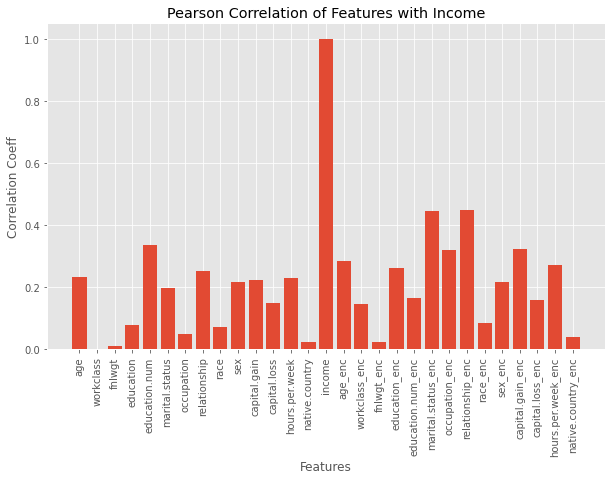

In [28]:
#Visualizing the pearson correlation with the target class
pcorr = df.drop('income_enc',1).corrwith(df.income_enc)
plt.figure(figsize=(10,6))
plt.title("Pearson Correlation of Features with Income")
plt.xlabel("Features")
plt.ylabel("Correlation Coeff")
plt.xticks(rotation=90)
plt.bar(pcorr.index, list(map(abs,pcorr.values)))

From the pearson correlation plot, we can see that correlation of few columns are very **low** with the target column, so, we ll drop them.

In [29]:
df.drop(['workclass', 'fnlwgt','occupation', 'race', 'native.country', 'fnlwgt_enc', 'race_enc', 'native.country_enc'], 1, inplace=True)

<AxesSubplot:>

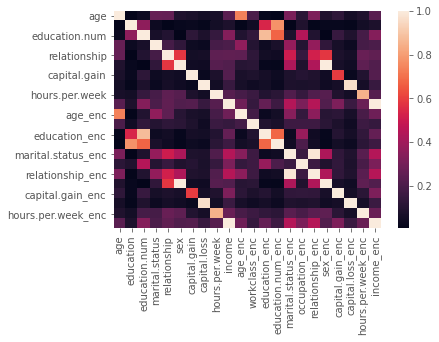

In [30]:
sns.heatmap(df.corr().apply(abs))

**Dropping redundant features**

We can see that **education_enc, education.num_enc and education.num** as well as **relationship_enc and marital.status_enc** have **high correlation**. So, we will only keep one of them based on their correlation with income_enc.

We also have some redundant feautres as we have engineered features from them(age, capital.gain, etc.).

In [31]:
df.drop(['age', 'education.num_enc', 'education_enc', 'marital.status_enc', 'capital.gain', 'capital.loss', 'hours.per.week'], 1, inplace = True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   education           32561 non-null  int32
 1   education.num       32561 non-null  int64
 2   marital.status      32561 non-null  int32
 3   relationship        32561 non-null  int32
 4   sex                 32561 non-null  int32
 5   income              32561 non-null  int32
 6   age_enc             32561 non-null  int64
 7   workclass_enc       32561 non-null  int64
 8   occupation_enc      32561 non-null  int64
 9   relationship_enc    32561 non-null  int64
 10  sex_enc             32561 non-null  int64
 11  capital.gain_enc    32561 non-null  int64
 12  capital.loss_enc    32561 non-null  int64
 13  hours.per.week_enc  32561 non-null  int64
 14  income_enc          32561 non-null  int64
dtypes: int32(5), int64(10)
memory usage: 3.1 MB


In [33]:
X = df.drop('income_enc', 1)
y = df.income_enc

### Train Test Split (3:1)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [35]:
print("No. of rows in training data:",X_train.shape[0])
print("No. of rows in testing data:",X_test.shape[0])

No. of rows in training data: 24420
No. of rows in testing data: 8141


### Random Over Sampling

*We can see the class imbalance in our target. This results in models that have poor predictive performance, specifically for the minority class. So, we need to random over sampling*

In [35]:
oversample = RandomOverSampler(sampling_strategy=0.5) #50% oversampling
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [36]:
y_over.value_counts()

0    18539
1     9269
Name: income_enc, dtype: int64

## Model Preparation

In [36]:
#Model Imports
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [38]:
seed= 42

In [39]:
models = {
    'LR':LogisticRegression(random_state=seed),
    'SVC':SVC(random_state=seed),
    'AB':AdaBoostClassifier(random_state=seed),
    'ET':ExtraTreesClassifier(random_state=seed),
    'GB':GradientBoostingClassifier(random_state=seed),
    'RF':RandomForestClassifier(random_state=seed),
    'XGB':XGBClassifier(random_state=seed),
    'LGBM':LGBMClassifier(random_state=seed)
    }

In [40]:
# evaluate a give model using cross-validation
def evaluate_models(model, xtrain, ytrain):
    cv = StratifiedKFold(shuffle=True, random_state=seed)
    scores = cross_val_score(model, xtrain, ytrain, scoring='accuracy', cv=cv, error_score='raise')
    return scores

def plot_scores(xval,yval,show_value=False):
    plt.ylim(ymax = max(yval)+0.5, ymin = min(yval)-0.5)
    plt.xticks(rotation=45)
    s = sns.barplot(xval,yval)
    if show_value:
        for x,y in zip(range(len(yval)),yval):
            s.text(x,y+0.1,round(y,2),ha="center")

In [41]:
# evaluate the models and store results for 100% oversampled minority class
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_models(model, X_train, y_train) 
    results.append(scores) 
    names.append(name) 
    print('*%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

*LR 0.846 (0.003)
*SVC 0.846 (0.002)
*AB 0.852 (0.003)
*ET 0.842 (0.003)
*GB 0.854 (0.002)
*RF 0.842 (0.002)
*XGB 0.849 (0.002)
*LGBM 0.852 (0.002)


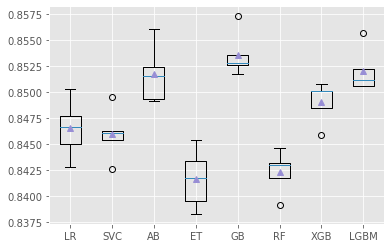

In [42]:
plt.boxplot(results, labels=names, showmeans=True)
plt.show() 

In [43]:
param_grids = {
    'LR':{'C':[0.001,0.01,0.1,1,10]},
    'SVC':{'gamma':[0.01,0.02,0.05,0.08,0.1], 'C':range(1,8)},
    
    'AB':{'learning_rate': [0.05, 0.1, 0.2], 'n_estimators': [100, 200, 500]},
    
    'ET':{'max_depth':[5,8,10,12], 'min_samples_split': [5,9,12],
          'n_estimators': [100,200,500,800]},
    
    'GB':{'learning_rate': [0.05, 0.1, 0.2], 'max_depth':[3,5,9],
          'min_samples_split': [5,7,9], 'n_estimators': [100,200,500],
          'subsample':[0.5,0.7,0.9]},
    
    'RF':{'max_depth':[3,5,9,15], 'n_estimators': [100, 200, 500, 1000],
          'learning_rate': [0.05, 0.1, 0.2], 'min_samples_split': [5,9,12]},
    
    'XGB':{'max_depth':[3,5,7,9], 'n_estimators': [100, 200, 500],
           'learning_rate': [0.05, 0.1, 0.2], 'subsample':[0.5,0.7,0.9]},
    
    'LGBM':{'n_estimators': [100,200,500],'learning_rate': [0.05, 0.1, 0.2],
            'subsample':[0.5,0.7,0.9],'num_leaves': [25,31,50]}
}

In [44]:
# !pip install sklearn-deap
# from evolutionary_search import EvolutionaryAlgorithmSearchCV

In [45]:
# evaluate the models and store results
# best_params = []
# names= []
# for name, param_grid, model in zip(param_grids.keys(), param_grids.values(), models.values()):
#     eascv = EvolutionaryAlgorithmSearchCV(model, param_grid, verbose=3, cv=3)
#     eascv.fit(X_train,y_train)
#     names.append(name)
#     best_params.append(eascv.best_params_)
#     print(name)
#     print("best score:",eascv.best_score_)
#     print("best params:",eascv.best_params_)

In [46]:
best_params=[
    {'C': 10},
    {'gamma': 0.1, 'C': 2},
    {'learning_rate': 0.1, 'n_estimators': 500},
    {'max_depth': 12, 'min_samples_split': 9, 'n_estimators': 100},
    {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 9, 'n_estimators': 200, 'subsample': 0.9},
    {'max_depth': 9, 'n_estimators': 200, 'min_samples_split': 5},
    {'max_depth': 3, 'n_estimators': 200, 'learning_rate': 0.1, 'subsample': 0.9},
    {'n_estimators': 100, 'learning_rate': 0.05, 'subsample': 0.9, 'num_leaves': 25}
            ]

In [47]:
models = [
    ('LR',LogisticRegression(random_state=seed)),
    ('SVC',SVC(random_state=seed)),
    ('AB',AdaBoostClassifier(random_state=seed)),
    ('ET',ExtraTreesClassifier(random_state=seed)),
    ('GB',GradientBoostingClassifier(random_state=seed)),
    ('RF',RandomForestClassifier(random_state=seed)),
    ('XGB',XGBClassifier(random_state=seed)),
    ('LGBM',LGBMClassifier(random_state=seed))
]

In [48]:
for model, param in zip(models, best_params):
    model[1].set_params(**param)

In [49]:
models.append(('MLModel',StackingClassifier(estimators = models[:-1])))

In [50]:
scores=[]
preds=[]
for model in models:
    model[1].fit(X_train,y_train)
    print(model[0],"trained.")
    scores.append(model[1].score(X_test,y_test))
    preds.append(model[1].predict(X_test))
print("Results are ready.")

LR trained.
SVC trained.
AB trained.
ET trained.
GB trained.
RF trained.
XGB trained.
LGBM trained.
MLModel trained.
Results are ready.


## Using Classification Based on Assocation

In [51]:
!pip install pyarc==1.0.23
!pip install pyfim
from pyarc import CBA, TransactionDB

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
     |████████████████████████████████| 357 kB 585 kB/s 
  Created wheel for pyfim: filename=pyfim-6.28-cp37-cp37m-linux_x86_64.whl size=683916 sha256=7cffa03e3a8b7fc066630ddbed15ac56640f4b167c70f1824b2a05f440233257
  Stored in directory: /root/.cache/pip/wheels/08/9f/26/09cb4efd027e46f96e0a0f33d0a74be614d3caf89c1eeb75a8
Successfully built pyfim
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [52]:
txns_train = TransactionDB.from_DataFrame(X_train.join(y_train))
txns_test = TransactionDB.from_DataFrame(X_test.join(y_test))


cba = CBA(support=0.15, confidence=0.5, algorithm="m1")
cba.fit(txns_train)

In [53]:
cba_score = cba.rule_model_accuracy(txns_test) 
scores.append(cba_score)
models.append(["CBA"])

In [54]:
model_names= [i[0] for i in models]
scores = list(map(lambda x: x*100, scores))

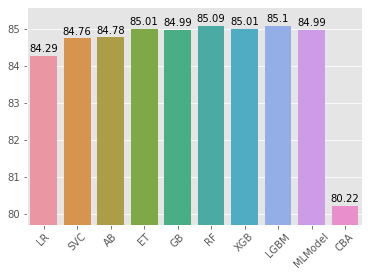

In [55]:
plot_scores(model_names, scores, True)

## Fairness

In [36]:
# This DataFrame is created to stock differents models and fair metrics that we produce in this notebook
algo_metrics = pd.DataFrame(columns=['model', 'fair_metrics', 'prediction', 'probs'])

def add_to_df_algo_metrics(algo_metrics, model, fair_metrics, preds, probs, name):
    return algo_metrics.append(pd.DataFrame(data=[[model, fair_metrics, preds, probs]], columns=['model', 'fair_metrics', 'prediction', 'probs'], index=[name]))

In [37]:
def fair_metrics(dataset, pred, pred_is_dataset=False):
    if pred_is_dataset:
        dataset_pred = pred
    else:
        dataset_pred = dataset.copy()
        dataset_pred.labels = pred
    
    cols = ['statistical_parity_difference', 'equal_opportunity_difference', 'average_abs_odds_difference',  'disparate_impact', 'theil_index']
    obj_fairness = [[0,0,0,1,0]]
    
    fair_metrics = pd.DataFrame(data=obj_fairness, index=['objective'], columns=cols)
    
    for attr in dataset_pred.protected_attribute_names:
        idx = dataset_pred.protected_attribute_names.index(attr)
        privileged_groups =  [{attr:dataset_pred.privileged_protected_attributes[idx][0]}] 
        unprivileged_groups = [{attr:dataset_pred.unprivileged_protected_attributes[idx][0]}] 
        
        classified_metric = ClassificationMetric(dataset, 
                                                     dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        metric_pred = BinaryLabelDatasetMetric(dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        acc = classified_metric.accuracy()

        row = pd.DataFrame([[metric_pred.mean_difference(),
                                classified_metric.equal_opportunity_difference(),
                                classified_metric.average_abs_odds_difference(),
                                metric_pred.disparate_impact(),
                                classified_metric.theil_index()]],
                           columns  = cols,
                           index = [attr]
                          )
        fair_metrics = fair_metrics.append(row)    
    
    fair_metrics = fair_metrics.replace([-np.inf, np.inf], 2)
        
    return fair_metrics

def plot_fair_metrics(fair_metrics):
    fig, ax = plt.subplots(figsize=(20,4), ncols=5, nrows=1)

    plt.subplots_adjust(
        left    =  0.125, 
        bottom  =  0.1, 
        right   =  0.9, 
        top     =  0.9, 
        wspace  =  .5, 
        hspace  =  1.1
    )

    y_title_margin = 1.2

    plt.suptitle("Fairness metrics", y = 1.09, fontsize=20)
    sns.set(style="dark")

    cols = fair_metrics.columns.values
    obj = fair_metrics.loc['objective']
    size_rect = [0.2,0.2,0.2,0.4,0.25]
    rect = [-0.1,-0.1,-0.1,0.8,0]
    bottom = [-1,-1,-1,0,0]
    top = [1,1,1,2,1]
    bound = [[-0.1,0.1],[-0.1,0.1],[-0.1,0.1],[0.8,1.2],[0,0.25]]

    display(Markdown("### Check bias metrics :"))
    display(Markdown("A model can be considered bias if just one of these five metrics show that this model is biased."))
    for attr in fair_metrics.index[1:len(fair_metrics)].values:
        display(Markdown("#### For the %s attribute :"%attr))
        check = [bound[i][0] < fair_metrics.loc[attr][i] < bound[i][1] for i in range(0,5)]
        display(Markdown("With default thresholds, bias against unprivileged group detected in **%d** out of 5 metrics"%(5 - sum(check))))

    for i in range(0,5):
        plt.subplot(1, 5, i+1)
        ax = sns.barplot(x=fair_metrics.index[1:len(fair_metrics)], y=fair_metrics.iloc[1:len(fair_metrics)][cols[i]])
        
        for j in range(0,len(fair_metrics)-1):
            a, val = ax.patches[j], fair_metrics.iloc[j+1][cols[i]]
            marg = -0.2 if val < 0 else 0.1
            ax.text(a.get_x()+a.get_width()/5, a.get_y()+a.get_height()+marg, round(val, 3), fontsize=15,color='black')

        plt.ylim(bottom[i], top[i])
        plt.setp(ax.patches, linewidth=0)
        ax.add_patch(patches.Rectangle((-5,rect[i]), 10, size_rect[i], alpha=0.3, facecolor="green", linewidth=1, linestyle='solid'))
        plt.axhline(obj[i], color='black', alpha=0.3)
        plt.title(cols[i])
        ax.set_ylabel('')    
        ax.set_xlabel('')

In [38]:
def get_fair_metrics_and_plot(data, model, plot=False, model_aif=False):
    pred = model.predict(data).labels if model_aif else model.predict(data.features)
    # fair_metrics function available in the metrics.py file
    fair = fair_metrics(data, pred)

    if plot:
        # plot_fair_metrics function available in the visualisations.py file
        # The visualisation of this function is inspired by the dashboard on the demo of IBM aif360 
        plot_fair_metrics(fair)
        display(fair)
    
    return fair

In [39]:
##train['Sex'] = train['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
df.head()

df = df.drop(['income','sex'], axis = 1)

#features = ["Pclass", "Sex", "SibSp", "Parch", "Survived"]
#X = pd.get_dummies(train_data[features])

In [40]:
df

,education,education.num,marital.status,relationship,age_enc,workclass_enc,occupation_enc,relationship_enc,sex_enc,capital.gain_enc,capital.loss_enc,hours.per.week_enc,income_enc
0,11,9,6,1,1,1,2,0,0,0,2,1,0
1,11,9,6,1,1,1,2,0,0,0,2,0,0
2,15,10,6,4,1,1,0,0,0,0,2,1,0
3,5,4,0,4,1,1,0,0,0,0,2,1,0
4,15,10,5,3,1,1,2,0,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,15,10,4,1,0,1,2,0,1,0,0,1,0
32557,7,12,2,5,0,1,2,1,0,0,0,1,0
32558,11,9,2,0,1,1,0,1,1,0,0,1,1
32559,11,9,6,4,1,1,0,0,0,0,0,1,0


In [41]:
privileged_groups = [{'sex_enc': 1}]
unprivileged_groups = [{'sex_enc': 0}]
dataset_orig = StandardDataset(df,
                                  label_name='income_enc',
                                  protected_attribute_names=['sex_enc'],
                                  favorable_classes=[1],
                                  privileged_classes=[[1]])

In [42]:
metric_orig_train = BinaryLabelDatasetMetric(dataset_orig, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

#### Original training dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.196276


In [43]:
import ipynbname
nb_fname = ipynbname.name()
nb_path = ipynbname.path()

from sklearn.ensemble import AdaBoostClassifier
import pickle

data_orig_train, data_orig_test = dataset_orig.split([0.7], shuffle=True)
X_train = data_orig_train.features
y_train = data_orig_train.labels.ravel()

X_test = data_orig_test.features
y_test = data_orig_test.labels.ravel()
num_estimators = 500

model = AdaBoostClassifier(learning_rate = 0.1, n_estimators = 1)

mdl = model.fit(X_train, y_train)
with open('../../Results/AdaBoost/' + nb_fname + '.pkl', 'wb') as f:
        pickle.dump(mdl, f)

with open('../../Results/AdaBoost/' + nb_fname + '_Train' + '.pkl', 'wb') as f:
    pickle.dump(data_orig_train, f) 
    
with open('../../Results/AdaBoost/' + nb_fname + '_Test' + '.pkl', 'wb') as f:
    pickle.dump(data_orig_test, f) 

In [45]:
from csv import writer
from sklearn.metrics import accuracy_score, f1_score

final_metrics = []
accuracy = []
f1= []

for i in range(1,num_estimators+1):
    
    model = AdaBoostClassifier(learning_rate = 0.1, n_estimators= i)
    
    mdl = model.fit(X_train, y_train)
    yy = mdl.predict(X_test)
    accuracy.append(accuracy_score(y_test, yy))
    f1.append(f1_score(y_test, yy))
    fair = get_fair_metrics_and_plot(data_orig_test, mdl)                           
    fair_list = fair.iloc[1].tolist()
    #fair_list.insert(0, i)
    final_metrics.append(fair_list)


invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars


In [46]:
import numpy as np
final_result = pd.DataFrame(final_metrics)
print(final_result)
final_result[3] = np.log(final_result[3])
final_result = final_result.transpose()
acc_f1 = pd.DataFrame(accuracy)
acc_f1['f1'] = f1
acc_f1 = pd.DataFrame(acc_f1).transpose()
acc = acc_f1.rename(index={0: 'accuracy', 1: 'f1'})
final_result = final_result.rename(index={0: 'statistical_parity_difference', 1: 'equal_opportunity_difference', 2: 'average_abs_odds_difference', 3: 'disparate_impact', 4: 'theil_index'})
final_result = pd.concat([acc,final_result])
final_result.columns = ['T' + str(col) for col in final_result.columns]
final_result.insert(0, "classifier", final_result['T' + str(num_estimators - 1)])   ##Add final metrics add the beginning of the df
final_result.to_csv('../../Results/AdaBoost/' + nb_fname + '.csv')
final_result

            0         1         2         3         4
0    0.000000  0.000000  0.000000       NaN  0.275709
1    0.000000  0.000000  0.000000       NaN  0.275709
2    0.000000  0.000000  0.000000       NaN  0.275709
3    0.000000  0.000000  0.000000       NaN  0.275709
4    0.000000  0.000000  0.000000       NaN  0.275709
..        ...       ...       ...       ...       ...
495 -0.181288 -0.154158  0.114867  0.266184  0.126698
496 -0.181288 -0.154158  0.114867  0.266184  0.126698
497 -0.181288 -0.154158  0.114867  0.266184  0.126698
498 -0.181288 -0.154158  0.114867  0.266184  0.126698
499 -0.181288 -0.154158  0.114867  0.266184  0.126698

[500 rows x 5 columns]


,classifier,T0,T1,T2,T3,T4,T5,T6,T7,T8,...,T490,T491,T492,T493,T494,T495,T496,T497,T498,T499
accuracy,0.848091,0.759034,0.759034,0.759034,0.759034,0.759034,0.759034,0.816153,0.816153,0.785239,...,0.848091,0.848091,0.848091,0.848091,0.848091,0.848091,0.848091,0.848091,0.848091,0.848091
f1,0.646161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.508753,0.508753,0.197399,...,0.646161,0.646161,0.646161,0.646161,0.646161,0.646161,0.646161,0.646161,0.646161,0.646161
statistical_parity_difference,-0.181288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.130704,-0.130704,-0.028605,...,-0.181288,-0.181288,-0.181288,-0.181288,-0.181288,-0.181288,-0.181288,-0.181288,-0.181288,-0.181288
equal_opportunity_difference,-0.154158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.126130,-0.126130,-0.051797,...,-0.154158,-0.154158,-0.154158,-0.154158,-0.154158,-0.154158,-0.154158,-0.154158,-0.154158,-0.154158
average_abs_odds_difference,0.114867,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.091730,0.091730,0.026116,...,0.114867,0.114867,0.114867,0.114867,0.114867,0.114867,0.114867,0.114867,0.114867,0.114867
disparate_impact,-1.323566,NaN,NaN,NaN,NaN,NaN,NaN,-1.363891,-1.363891,-1.596109,...,-1.323566,-1.323566,-1.323566,-1.323566,-1.323566,-1.323566,-1.323566,-1.323566,-1.323566,-1.323566
theil_index,0.126698,0.275709,0.275709,0.275709,0.275709,0.275709,0.275709,0.173099,0.173099,0.241607,...,0.126698,0.126698,0.126698,0.126698,0.126698,0.126698,0.126698,0.126698,0.126698,0.126698
